# Let's get started with coding

## Start with imports

In [15]:
import numpy as np
import random

## get library files

In [16]:
from ME4612021Fproject import *
import ME461Group as DummyPlayer
import ulas as tulumba

8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--
	GROUP IDS and STARTING LOCATIONS 
8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--8<--
     atlas ID = 9, starting from (575, 725)
backspacex ID = 8, starting from (375, 725)
    ducati ID = 4, starting from (175, 25)
    hepsi1 ID = 5, starting from (375, 25)
   mechrix ID = 7, starting from (175, 725)
  meturoam ID = 3, starting from (25, 575)
    nebula ID = 1, starting from (25, 175)
 ohmygroup ID = 6, starting from (575, 25)
   tulumba ID = 2, starting from (25, 375)

]4;0;#101c21\]4;1;#704954\]4;2;#8D525B\]4;3;#965763\]4;4;#A95A66\]4;5;#BE616B\]4;6;#C15F6C\]4;7;#d9a9ad\]4;8;#977679\]4;9;#704954\]4;10;#8D525B\]4;11;#965763\]4;12;#A95A66\]4;13;#BE616B\]4;14;#C15F6C\]4;15;#d9a9ad\]10;#d9a9ad\]11;#101c21\]12;#d9a9ad\]13;#d9a9ad\]17;#d9a9ad\]19;#101c21\]4;232;#101c21\]4;256;#d9a9ad\]708;#101c21\

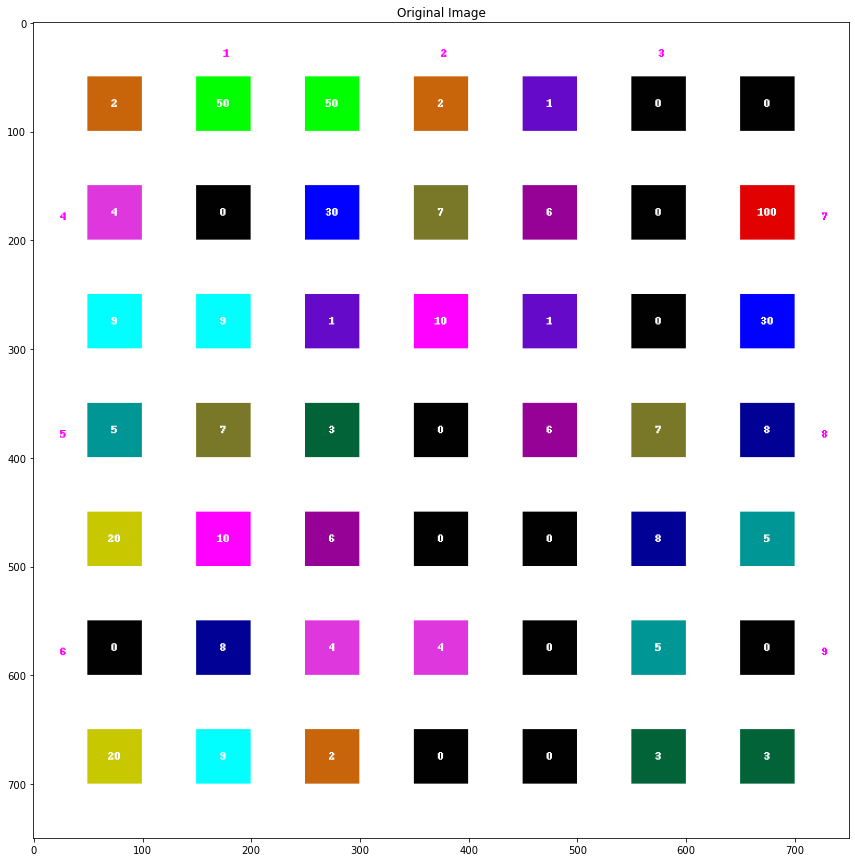

In [17]:
# initial points in the game for each player
Pinit = 301
# groups names
group_names = ['atlas', 'backspacex', 'ducati', 'hepsi1', 'mechrix', 'meturoam', 'nebula', 'ohmygroup', 'tulumba']
#group_names = ['altas', 'backspacex'] 
Players = {}
playerID = [x for x in range(len(group_names))] # generate player IDs
random.shuffle(playerID) # shuffle player order

# set default player locations, note that playerIDs are randomly ordered
initLocs = [(25, 175),(25, 375),(25, 575),(175, 25),(375, 25),(575, 25),(175, 725),(375, 725),(575, 725)]
# a summary of the players
legend = f'{12*"8<--"}\n\tGROUP IDS and STARTING LOCATIONS \n{12*"8<--"}\n'


# the game should be set up, let's plot an informative version of the game board
for gInd, gName in enumerate(group_names):
    if gName == 'tulumba':
        player = tulumba.tulumba(gName, colorz, maxStep, maxTime) # set the name, color and max step size for the current player
        # keep record of player object, player ID, a history list, their current location and current points
        Players[gName] = [player, playerID[gInd]+1, [], initLocs[playerID[gInd]], Pinit]
    else:
        player = DummyPlayer.ME461Group(gName, colorz, maxStep, maxTime) # set the name, color and max step size for the current player
        # keep record of player object, player ID, a history list, their current location and current points
        Players[gName] = [player, playerID[gInd]+1, [], initLocs[playerID[gInd]], Pinit]

# genereate a new game for these players
aGame = LetsPlayAGame(Players, initLocs, nCorr, colorz, imSize, digits, maxStep) 

for gInd, gName in enumerate(Players.keys()):
    aGame.aMaze.DrawPolyLine(aGame.pmaze, [initLocs[Players[gName][1]-1]], header = digits[Players[gName][1]] )
    legend +=f'{"{0: >10}".format(gName)} ID = {playerID[gInd]+1}, starting from {initLocs[playerID[gInd]]}\n'

# set figures to plot larger than default
plt.rcParams["figure.figsize"] = (15,15)
plt.imshow(aGame.pmaze)
plt.title('Original Image')
# finally print the legend
print(legend)
ormaze = aGame.pmaze.copy()
# in case you want a movie, clear frame images first
!rm frame*.png 2>>dumpy
# number of nowin sessions
numNoWin = 0

In [18]:
# debugger
tulumba.tulumba.run(Players['tulumba'][0],aGame.maze,aGame.GenerateInfo(Players))

[(3, 0), (3, 1), (2, 1), (1, 1)]


[[225, 375],
 [25, 175],
 [275, 175],
 [275, 175],
 [275, 175],
 [275, 125],
 [275, 125],
 [275, 75]]

[(3, 0), (3, 1), (2, 1), (1, 1)]
0.0021651140123140067:0.18655998399481177
fastest in:0.0021651140123140067 slowest in: 0.18655998399481177

...tulumba returned in 0.0022 	 step size: 100
remaining distance: 100
moving Y 100 from [25, 375] to [125, 375]
proposed path:[(25, 375), [225, 375], [25, 175], [275, 175], [275, 175], [275, 175], [275, 125], [275, 125], [275, 75]], 
resulting path:[(25, 375), [125, 375]]

....hepsi1 returned in 0.0227 	 step size: 94
remaining distance: 94
moving 3 from [375, 25] to [375, 28]
remaining distance: 91
moving 53 from [375, 28] to [322, 28]
remaining distance: 38
moving X 38 from [322, 28] to [322, 66]
proposed path:[(375, 25), [375, 28], [322, 28], [322, 72]], 
resulting path:[(375, 25), [375, 28], [322, 28], [322, 66]]

..meturoam returned in 0.0579 	 step size: 84
remaining distance: 84
moving 46 from [25, 575] to [25, 529]
remaining distance: 38
moving 22 from [25, 529] to [47, 529]
remaining distance: 16
moving X -16 from [47, 529] to [47, 513]


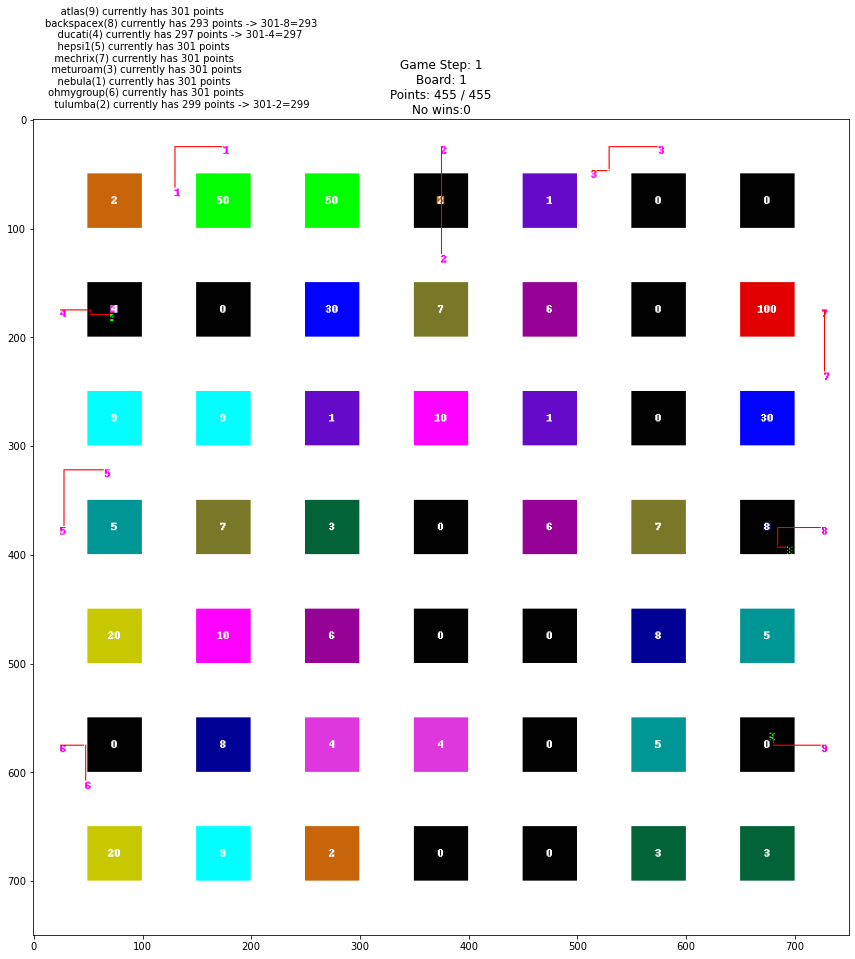

In [19]:
debugMode = True
numMaxNoPlay = 12
win, summary = aGame.PlayAStep(debugMode)
if win == []: # oops
    print(summary)
else:
    # perf contains time performance data
    if len(win.keys()) == 0:
        numNoWin += 1
    else: # reset no win counter
        numNoWin = 0
    # display results
    plt.rcParams["figure.figsize"] = (20,15)
    plt.imshow(aGame.pmaze)
    plt.text(10,10,summary+'\n')
    plt.title(f'Game Step: {aGame.numSteps}\nBoard: {aGame.numBoards}\nPoints: {TotalPoints()} / {aGame.aMaze.RemainingPoints()}\nNo wins:{numNoWin}')
    plt.savefig(f'frame{aGame.numSteps-1}.png')

    if numNoWin >= numMaxNoPlay or  aGame.aMaze.RemainingPoints() == 0: # then we need a new game
        if  aGame.aMaze.RemainingPoints() == 0:
            print('No bases left, board will be reset')
        else:
            print('Too many no win games, resetting board next time')
        aGame.ResetBoard()
        numNoWin = 0

